In [16]:
# !git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-350-g6096750f Python-3.11.9 torch-2.4.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4036MiB)


Setup complete ✅ (6 CPUs, 15.6 GB RAM, 50.4/62.6 GB disk)


In [17]:
import torch
from PIL import Image
import os
import matplotlib.pyplot as plt
from torchvision.io import read_image

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="praIWt48RZMcIdJLhzQR")
project = rf.workspace("polyakovk").project("vegs-ssboe")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to vegs-1 in yolov5pytorch:: 100%|██████████| 908/908 [00:00<00:00, 12018.71it/s]


In [25]:
!python /home/polyakovk/ds_bootcamp_linux/proj2/yolov5/train.py --batch 32 --epochs 30 --data /home/polyakovk/ds_bootcamp_linux/proj2/yolov5/vegs-1/data.yaml --weights yolov5n.pt

train: weights=yolov5n.pt, cfg=, data=/home/polyakovk/ds_bootcamp_linux/proj2/yolov5/vegs-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-350-g6096750f Python-3.11.9 torch-2.4.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4036MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_m

In [26]:
model = torch.hub.load(
    repo_or_dir = '.',
    model = 'custom',
    path='/home/polyakovk/ds_bootcamp_linux/proj2/yolov5/runs/train/exp/weights/best.pt',
    source='local'
    )

YOLOv5 🚀 v7.0-350-g6096750f Python-3.11.9 torch-2.4.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4036MiB)

Fusing layers... 
Model summary: 157 layers, 1763224 parameters, 0 gradients, 4.1 GFLOPs
Adding AutoShape... 


/home/polyakovk/ds_bootcamp_linux/proj2/yolov5/models/common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


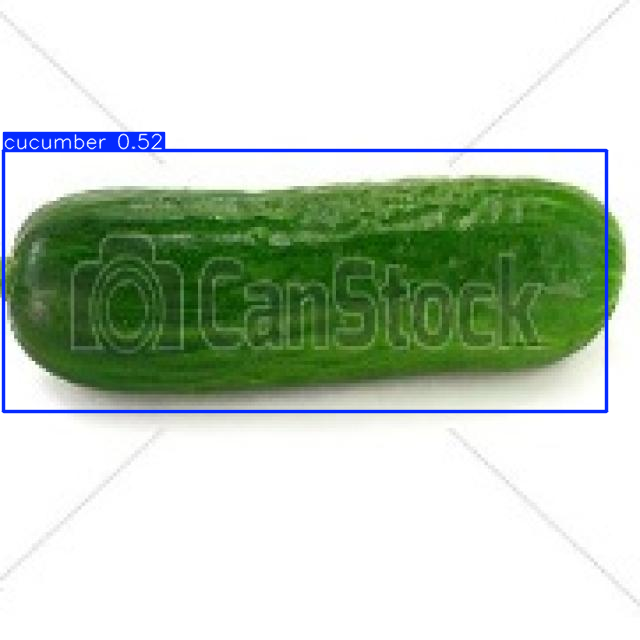

In [97]:
import os
import random
import torch
import torchvision.transforms as T
from PIL import Image
from torchvision.io import read_image

# Установите вероятность отрисовки детекций
model.conf = 0.1

# Путь к директории с изображениями
image_dir = '/home/polyakovk/ds_bootcamp_linux/proj2/yolov5/vegs-1/test/images'

# Получаем список всех изображений в директории
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Выбираем случайное изображение
random_image_file = random.choice(image_files)
image_path = os.path.join(image_dir, random_image_file)

# Читаем картинку
img = T.ToPILImage()(read_image(image_path))
model.eval()
with torch.inference_mode():
    results = model(img)

# Отображаем результаты
results.show()

In [ ]:
import streamlit as st
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from io import BytesIO
import torch
import torch.nn as nn
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
from torchvision.models import resnet18, ResNet18_Weights
import requests
from model_utils import ResNet18ForLocalization,load_image_from_url, predict_and_display


st.title('Object Detection with ResNet18')

option = st.selectbox('Choose how to upload image', ['From URL', 'From File'])

if option == 'From URL':
    url = st.text_input('Image URL')
    if st.button('Classify'):
        if url:
            image = load_image_from_url(url)
            predict_and_display(image)
        else:
            st.error("Please enter a valid URL.")

elif option == 'From File':
    uploaded_files = st.file_uploader("Choose images...", accept_multiple_files=True)
    if uploaded_files:
        for uploaded_file in uploaded_files:
            image = Image.open(uploaded_file).convert("RGB")
            predict_and_display(image)